Read the outlier-removed df.

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

train_data = pd.read_csv("UsedCarSellingInfoCraigslist_OutlierRemoved.csv")

Let's drop 'Unnamed: 0'.

In [2]:
train_data.drop(['Unnamed: 0'], axis = 1, inplace=True)

Let's makes features as X and target as y.

In [3]:
X = train_data.drop('price', axis=1)
y = train_data['price'].values

# Split train test data

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Random Forest Regressor with RandomizedSearchCV

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

# CART Random Forest Regression Feature Importance

In [7]:
from matplotlib import pyplot as plt

Feature: 0, Score: 0.05090
Feature: 1, Score: 0.33581
Feature: 2, Score: 0.08572
Feature: 4, Score: 0.16935


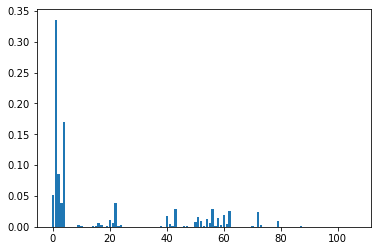

Wall time: 417 ms


<Figure size 432x288 with 0 Axes>

In [8]:
%%time
# get importance
importance = rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    if v >= 0.05:
        print('Feature: %0d, Score: %.5f' % (i,v))
        
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show();
plt.savefig('randomforestregressor_feature_importance.png');

Let's reduce number of features within meaningful range, more than 0.05 only.

Let's makes NEW features as X1.

In [9]:
X_train.columns[[0,1,2,4]]

Index(['cylinders', 'odometer', 'weather', 'usage_yr'], dtype='object')

Let's reduce number of features within meaningful range, more than 0.05 only.

In [10]:
X1 = train_data[['cylinders', 'odometer', 'weather', 'usage_yr']]

In [11]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X1, y, random_state=42)

In [12]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [13]:
%time
params = {'criterion' :['mse', 'mae'],
          'n_estimators' : [120,300,500,800,1200],
          'max_depth' : [5,8,15,25,30,None],
          'min_samples_split' : [1,2,5,10,15,100],
          'min_samples_leaf' : [2,5,10],
          'max_features' : ['auto', 'sqrt', 'log2', None]}
random_search_cv = RandomizedSearchCV(rf, params, n_jobs=-1, cv=2, n_iter=2, verbose=2, random_state=42)
random_search_cv.fit(X_train, y_train)
print("R-Squared::{}".format(random_search_cv.best_score_))
print("Best Hyperparameters::\n{}".format(random_search_cv.best_params_))

Wall time: 0 ns
Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:   16.4s remaining:   16.4s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed: 853.5min finished


R-Squared::0.005147258331855031
Best Hyperparameters::
{'n_estimators': 120, 'min_samples_split': 15, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 15, 'criterion': 'mse'}


In [23]:
from sklearn import ensemble

In [24]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error

In [25]:
params_ = {'n_estimators': 120, 'min_samples_split': 15, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 15, 'criterion': 'mse'}

In [26]:
reg = ensemble.RandomForestRegressor(**params_)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 75770043341140.5781


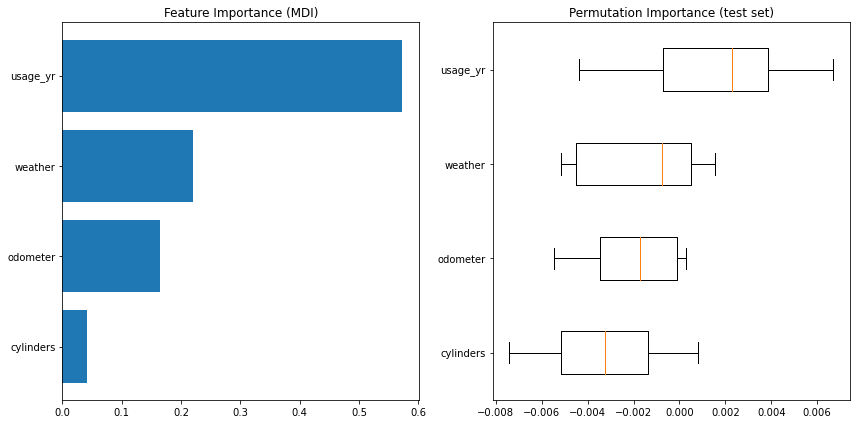

In [27]:
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, ['cylinders', 'odometer', 'weather', 'usage_yr'])
plt.title('Feature Importance (MDI)')

result = permutation_importance(reg, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=['cylinders', 'odometer', 'weather', 'usage_yr'])
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

In [28]:
plt.savefig('randomforest_feature.png')

<Figure size 432x288 with 0 Axes>

In [19]:
%%time
params = {'criterion' :['mse', 'mae'],
          'n_estimators' : [120,300,500,800,1200],
          'max_depth' : [5,8,15,25,30,None],
          'min_samples_split' : [1,2,5,10,15,100],
          'min_samples_leaf' : [2,5,10],
          'max_features' : ['auto', 'sqrt', 'log2', None]}
random_search_cv = RandomizedSearchCV(rf, params, n_jobs=-1, cv=50, n_iter=1, verbose=2, random_state=42)
random_search_cv.fit(X_train, y_train)
print("R-Squared::{}".format(random_search_cv.best_score_))
print("Best Hyperparameters::\n{}".format(random_search_cv.best_params_))

Fitting 50 folds for each of 1 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  9.5min finished


R-Squared::-1835.2027583457211
Best Hyperparameters::
{'n_estimators': 120, 'min_samples_split': 15, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 15, 'criterion': 'mse'}
Wall time: 9min 40s


In [20]:
%%time
params = {'criterion' :['mse', 'mae'],
          'n_estimators' : [120,300,500,800,1200],
          'max_depth' : [5,8,15,25,30,None],
          'min_samples_split' : [1,2,5,10,15,100],
          'min_samples_leaf' : [2,5,10],
          'max_features' : ['auto', 'sqrt', 'log2', None]}
random_search_cv = RandomizedSearchCV(rf, params, n_jobs=-1, cv=100, n_iter=1, verbose=2, random_state=42)
random_search_cv.fit(X_train, y_train)
print("R-Squared::{}".format(random_search_cv.best_score_))
print("Best Hyperparameters::\n{}".format(random_search_cv.best_params_))

Fitting 100 folds for each of 1 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 19.3min finished


R-Squared::-5249.097606738907
Best Hyperparameters::
{'n_estimators': 120, 'min_samples_split': 15, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 15, 'criterion': 'mse'}
Wall time: 19min 28s


In [24]:
from sklearn import tree

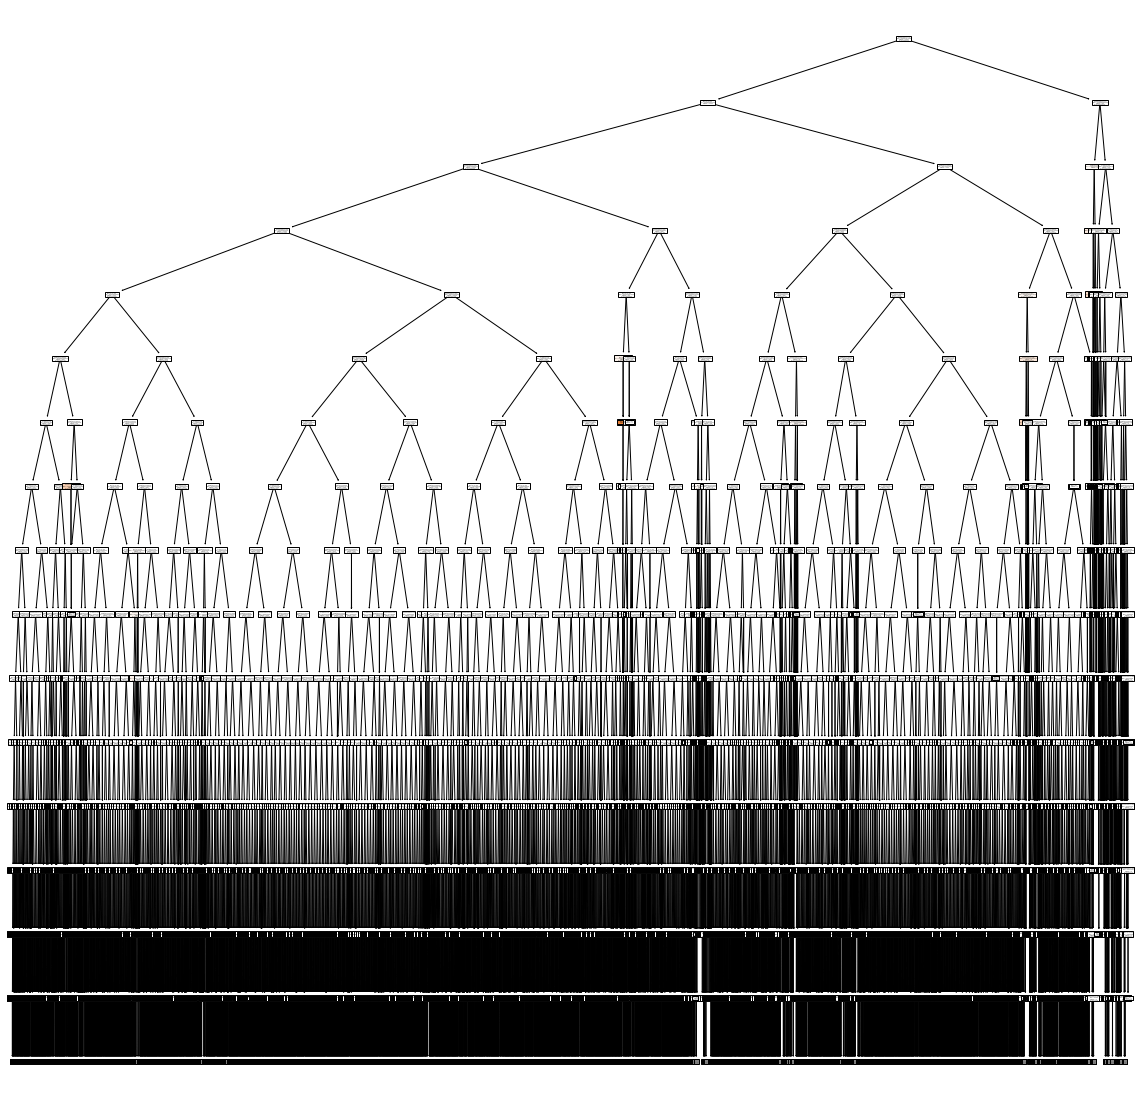

In [25]:
%%time
from matplotlib import pyplot as plt
plt.figure(figsize=(20,20))
_ = tree.plot_tree(rf.estimators_[0], feature_names=X.columns, filled=True, max_depth=15)

In [26]:
plt.savefig('randomforesttree.png')

<Figure size 432x288 with 0 Axes>